<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Defining Problem Statement and Analysing basic metrics**


###**About Aerofit**

Aerofit is a leading brand in the field of fitness quipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater the needs of all categories of people.

###**Business Problem**

The market research team at AeroFit wants identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

##**Imposrting Libraries**

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation librabry based on matplotlib
from scipy import stats
from scipy.stats import norm


##**Importing the dataset**

In [43]:
! gdown 1jyIrDhgS-OKwby2mctMIGOFyrXG2VMec

Downloading...
From: https://drive.google.com/uc?id=1jyIrDhgS-OKwby2mctMIGOFyrXG2VMec
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 16.8MB/s]


In [44]:
df=pd.read_csv('/content/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


##**Baisc Analysis**

###**Shape of the data**

In [45]:
df.shape

(180, 9)

###**Columns in DataFrame**

In [46]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

####**First 5 rows**

In [47]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


###**Data Type of all attributes(columns)**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


####**Analysis**



1.   There is no missing values in dataframe
2.   Most of the columns are numeric except Product, Gender and Marital Status



###**Statistical Summary**
####**Statastical Summary of Numeric Columns**

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


####**Statistical Summary of Object Columns**

In [50]:
df.describe(include = 'object').T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


Here we can see most of the users are using **KP281** machine and its frequency or count is 80 out of 180 total counts

And the product is mostly has most of the users from male category


##**Non-Graphical Analysis: Value counts and unique attributes**

###**Product Column**


####**Unique**

In [51]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Aerofit produces three treadmill models: KP281,KP481, and KP781

####**value counts**

In [52]:
Product_counts = df['Product'].value_counts(normalize = True)*100
Product_counts

,proportion
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


**Insight:**

Among the users, 44.44% prefer using KP281 Treadmill, while 33.33% users prefer KP481 treadmill, and only 22.22% people favor the KP871 treadmill.

####**Age Column**

**Unique**

In [53]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [54]:
df['Age'].nunique()

32

**Value Counts**

In [55]:
age_count = df['Age'].value_counts(normalize = True)*100
age_count.round(2)

,proportion
Age,
25,13.89
23,10.00
24,6.67
26,6.67
28,5.00
35,4.44
33,4.44
30,3.89
38,3.89


In [56]:
age_count[(age_count.index>=20)&(age_count.index<=30)].sum().round(2)

63.89

**Insight**

Approximately 64% of Aerofit Treadmill users belong to age group of 20-30.

####**Gender Column**

**Unique**

In [57]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**Value Counts**

In [58]:
gender_count=df['Gender'].value_counts(normalize = True)*100
gender_count

,proportion
Gender,
Male,57.777778
Female,42.222222


**Insight**

Aerofit has 57.78 male cistomers and 42.22% female customers.

####**Marital Status**

**Unique**

In [59]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

**Value counts**

In [60]:
df['MaritalStatus'].value_counts(normalize = True)*100

,proportion
MaritalStatus,
Partnered,59.444444
Single,40.555556


**Insight**

59.44% people are married, where remaining 40.56% are single.

##**Data Preprocessing**

###**Handling Missing Values**

In [61]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Inference**

There are no missing values in dataset.

###**Handling Outliers**

####**Income column**

In [62]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


To find outliers inincome column we need to use boxplot here. But before using the boxplot we need to find these 5 points:



1.   q3 - upper quartile
2.   q1 - lower quartile
3.   Median
4.   Upper bound
5.   Lower bound



In [63]:
q1 = np.percentile(df['Income'],25)
q3 = np.percentile(df['Income'],75)
print('q1 =', q1)
print('q2 =', q3)

q1 = 44058.75
q2 = 58668.0


####**Analysis:**

In [64]:
# to fond upper bound and lower bound need to find IQR(inter quartile range)
IQR = q3 - q1
IQR

14609.25

####**Analysis:**


IQR = 14609.25

In [65]:
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR
print('upper bound = ', upper_bound)
print('lower bound =', lower_bound)
print('Median=', df['Income'].median())

upper bound =  80581.875
lower bound = 22144.875
Median= 50596.5


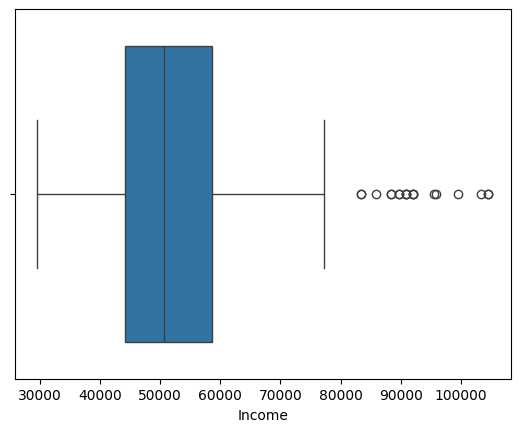

In [66]:
sns.boxplot(data = df, x= 'Income')
plt.show()



*   As we see there are outliers in the 'Income' column.
*   all values > 80581.75(upper bound) are outliers in the 'Income' column



In [67]:
(len(df.loc[df['Income']>upper_bound])/len(df))*100

10.555555555555555

**Analysis**

10.5% values in Income column are outliers but we choose not to drop them as these values may required to draw some valuable insights and it may be useful for customer profiling.

####**Miles Column**

Like 'Income' we can perform same steps to find outliers in 'Miles' column

In [68]:
df['Miles'].describe()

,Miles
count,180.000000
mean,103.194444
std,51.863605
min,21.000000
25%,66.000000
50%,94.000000
75%,114.750000
max,360.000000


In [69]:
q1 = np.percentile(df['Miles'],25)
q3 = np.percentile(df['Miles'],75)
IQR = q3 -q1
upper_bound = q3 + 1.5*IQR
lower_bound = q1 - 1.5*IQR
print('IQR =', IQR)
print('upper bound =', upper_bound)
print('lower bound =', lower_bound)
print('Median = ', df['Miles'].median())


IQR = 48.75
upper bound = 187.875
lower bound = -7.125
Median =  94.0


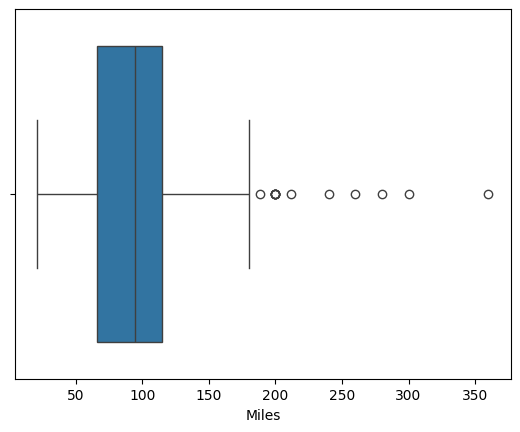

In [70]:
sns.boxplot(data = df, x = 'Miles')
plt.show()



*   As we see there are outliers in miles column

*  all values > 187.875(upper bound) are outliers in 'Miles' column



In [71]:
(len(df.loc[df['Miles'] > upper_bound])/len(df))* 100

7.222222222222221

**Analysis**

7.22% values in 'Miles column are outliers but we choose not to drop them as these values may required to draw soem valuable insights and it may be useful for customer profiling.

###**Adding New columns - Income group and Age group**

####**Age Group**

To gain valuable insights, it is essential to group age column in distinct groups, such as young, middle-age, and old. It will allow us to understand customer purchase behaviour.

In [72]:
df['Age'].describe()

,Age
count,180.000000
mean,28.788889
std,6.943498
min,18.000000
25%,24.000000
50%,26.000000
75%,33.000000
max,50.000000


In [73]:
df['Age group'] = pd.cut(df['Age'], bins = [17,29,39,50], labels = ['Young', 'Middle-aged', 'Old'])

In [74]:
df['Age group'].value_counts()

,count
Age group,
Young,113
Middle-aged,50
Old,17


Similarly, we can categarizr 'Income values in 3 groups 'Low', 'Medium', 'High'. It will not only allow us to gain valuable insight but also help in customer profiling.

In [75]:
df['Income'].describe()

,Income
count,180.000000
mean,53719.577778
std,16506.684226
min,29562.000000
25%,44058.750000
50%,50596.500000
75%,58668.000000
max,104581.000000


In [76]:
df['Income Group'] = pd.cut(df['Income'], bins = [29000,50000,75000,105000], labels = ['low','Medium','High'])

In [77]:
df['Income Group'].value_counts()

,count
Income Group,
low,83
Medium,76
High,21


In [78]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income Group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,low


##**Univariate Analysis**

###**Categorical Columns**

####**Distribution of Treadmmills among Aerofit customers**

<ipython-input-79-920e9ab47000>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = df['Product'], palette= 'pastel')


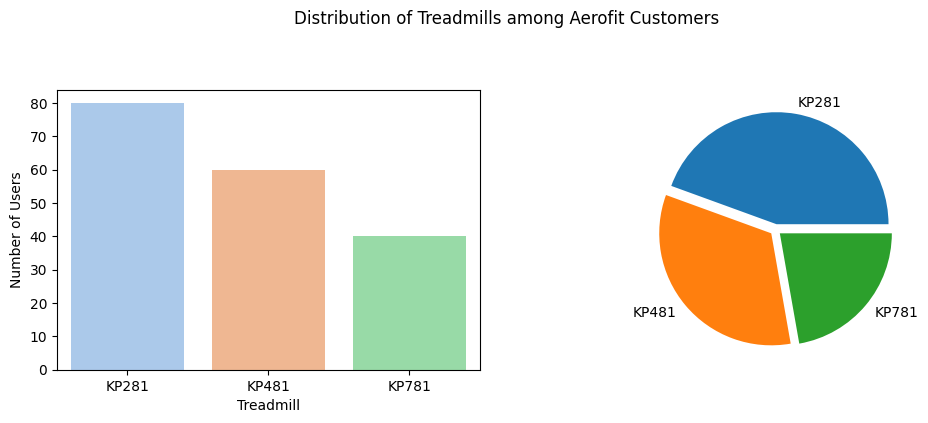

In [79]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(data = df, x = df['Product'], palette= 'pastel')
plt.xlabel('Treadmill')
plt.ylabel('Number of Users')
plt.subplot(2,2,2)
plt.pie(df['Product'].value_counts(), labels = df['Product'].unique(), explode = (0.05,0.05, 0.05))
plt.suptitle('Distribution of Treadmills among Aerofit Customers')
plt.show()


####**Distribution of gender among Aerofit customers**

<ipython-input-80-80ebaea3e6f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = df['Gender'], palette = 'pastel')


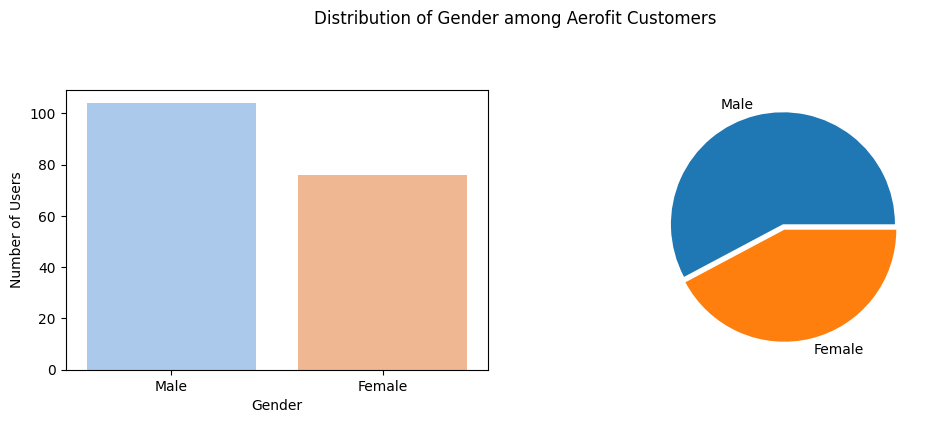

In [80]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.countplot(data=df, x = df['Gender'], palette = 'pastel')
plt.xlabel('Gender')
plt.ylabel('Number of Users')

plt.subplot(2,2,2)
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].unique(),explode=(0.05,0))

plt.suptitle('Distribution of Gender among Aerofit Customers')
plt.show()

Aerofit has 57.78% male customers and 42.22% female customers.

####**Distribution of Age - Group across Aerofit customers**

<ipython-input-86-b59a03c78a5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = df['Age group'], palette = 'pastel')


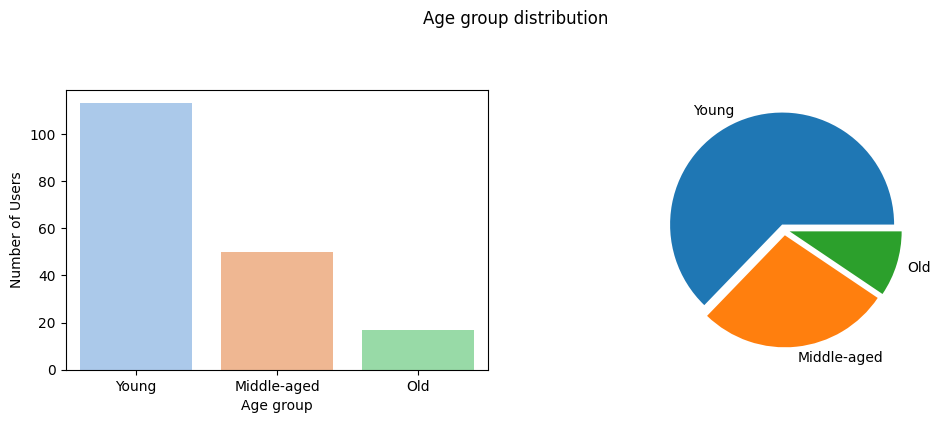

In [86]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x = df['Age group'], palette = 'pastel')
plt.xlabel('Age group')
plt.ylabel('Number of Users')

plt.subplot(2,2,2)
plt.pie(df['Age group'].value_counts(), labels = df['Age group'].unique(),explode = (0.05,0.05,0.05))

plt.suptitle('Age group distribution')
plt.show()

**Insight**



1.   Most of Aerofit customer falls under young age-group (18-29).
2.   27.78 % of middle-aged (30-39) users prefer to use the Aerofit Treadmills.
3.   9.4% of users in the old (40-50) age group prefer purchasing Aerofit treadmills.



####**Distribution of Income group**

<ipython-input-89-32425a3ce70f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Income Group', palette = 'pastel')


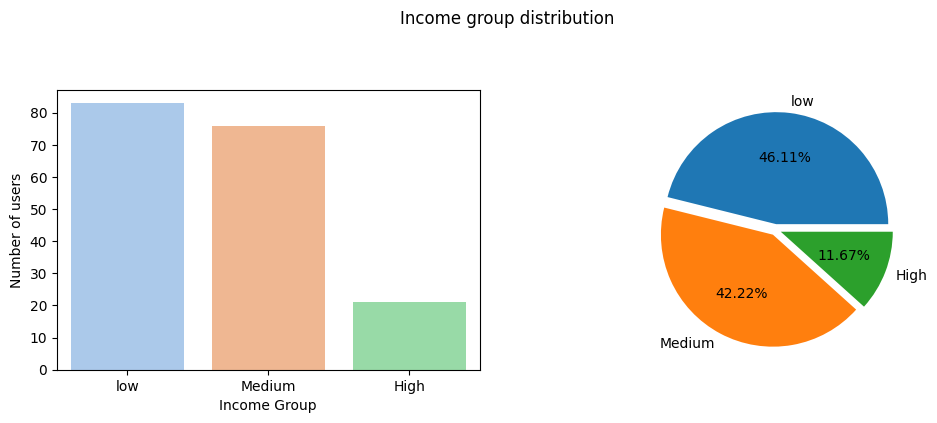

In [89]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Income Group', palette = 'pastel')
plt.xlabel('Income Group')
plt.ylabel('Number of users')

plt.subplot(2,2,2)
plt.pie(df['Income Group'].value_counts(), labels = df['Income Group'].unique(), explode = (0.05,0.05,0.05), autopct='%1.2f%%')

plt.suptitle('Income group distribution')
plt.show()

**Insight**



1.   Approximately 88% of Aerofit customers belong to the low-income (29000 - 50000 USD) and medium-income(51000 - 75000 uSD) groups.
2.   Remaining 11.67% belongs to High income group (above 75000 usd).



####**Distribution of Fitness Levels**

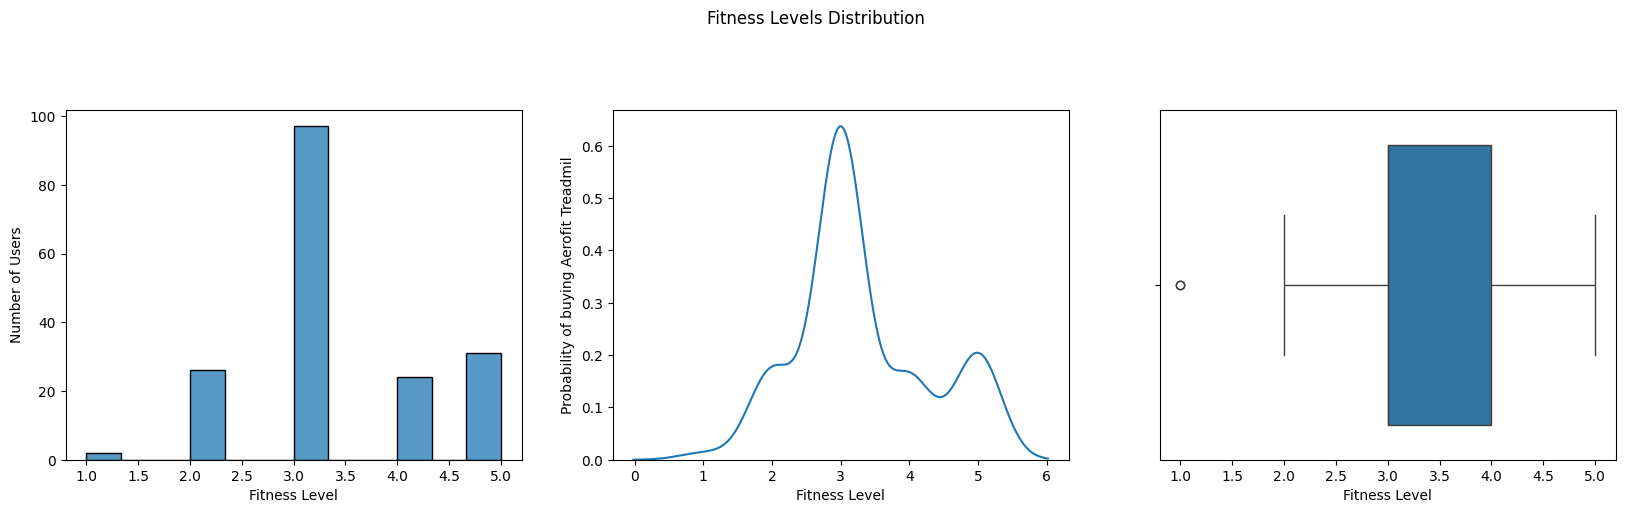

In [90]:
plt.figure(figsize = (20,10))

#Histogram
plt.subplot(2,3,1)
sns.histplot(data = df, x = 'Fitness')
plt.xlabel('Fitness Level')
plt.ylabel('Number of Users')

# KDE plot
plt.subplot(2,3,2)
sns.kdeplot(data = df, x = 'Fitness')
plt.xlabel('Fitness Level')
plt.ylabel('Probability of buying Aerofit Treadmil')

# Boxplot
plt.subplot(2,3,3)
sns.boxplot(data = df, x = 'Fitness')
plt.xlabel('Fitness Level')
plt.suptitle('Fitness Levels Distribution')
plt.show()



**Insight**

The majority of Aerofit customers possess fitness level 3, which aligns with a high likelihood of them purchasing treadmills.

##**Bivariate Analysis**

####**Distribution of Gender across each Treadmill**

In [92]:
#counting the number of customers for each gender in each product group
gender_df = df.groupby(['Product','Gender']).size().unstack()
gender_df

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


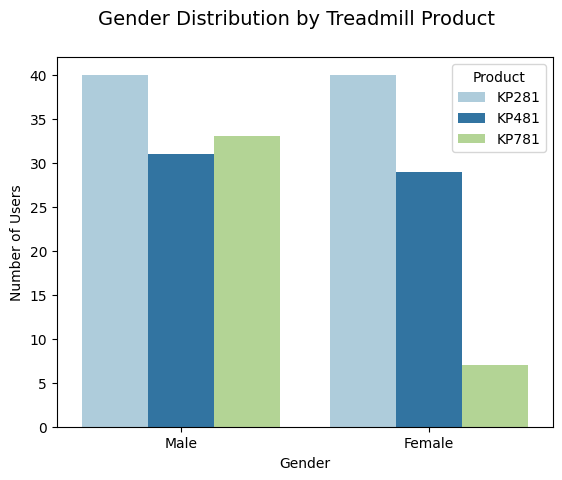

In [93]:
sns.countplot(data = df, x = 'Gender', hue = 'Product', palette = 'Paired')
plt.suptitle('Gender Distribution by Treadmill Product', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show()

**Insight**



1.   both male and female customers prefer using the KP281 tradmill due to its entry-level staus and cost-effectiveness compared to other two options.
2.   Both male and female customers equally prefer the KP481 Ttreadmill as it offers the best value for money among the other two options.
3.   Among male customers, the KP781 treadmill is the most preferred due to its advanced features following the KP281. However, the number of female customers using the KP781 treadmill is very low, possibly due to its higher cost compared to other options.



####**Distribution of Income-group across Treadmills**

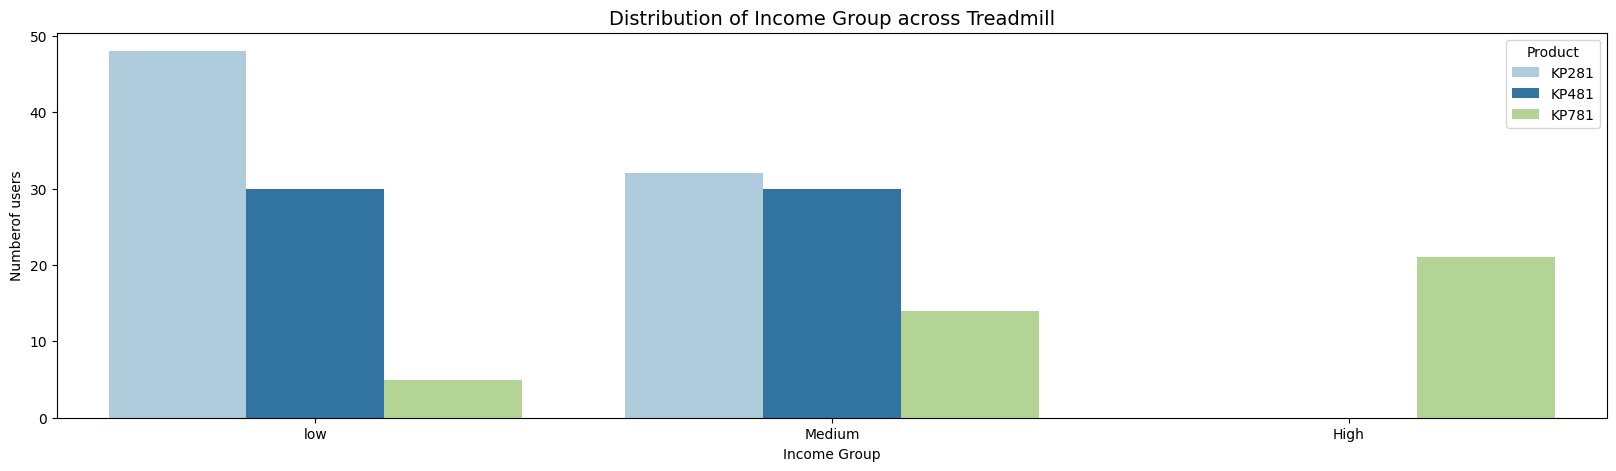


---------Income group-------------
29000-50000: Low
51000-75000: Medium
Above 76000: High


In [117]:
sns.countplot(data= df, x = 'Income Group', hue= 'Product', palette = 'Paired')
plt.title('Distribution of Income Group across Treadmill', fontsize = 14)
plt.xlabel('Income Group')
plt.ylabel('Numberof users')
plt.show()
print()
print('---------Income group-------------')
print('29000-50000: Low')
print('51000-75000: Medium')
print('Above 76000: High')

**Insight**

1. Customers belonging to the low-income group prefer KP281 due to it affordability compared to other two treadmills. Additionally, around 30 customers from this income group have purchased KP481. However, only few customers in this income group have chosen to purchase the more expensive KP781 treadmill.
2. Customers belonging to the middle - income group exhibit similar preference for both KP281
and KP481 treadmills, with a marginal difference in frequency. Additionally, approximately 15-20 customers from this group have also purchased more expensive KP781 treadmill.
3. Customers belonging to high-income group exclusively prefer KP781 due to its advanced features and higher cost compared to other two treadmills.

###**HeatMap**

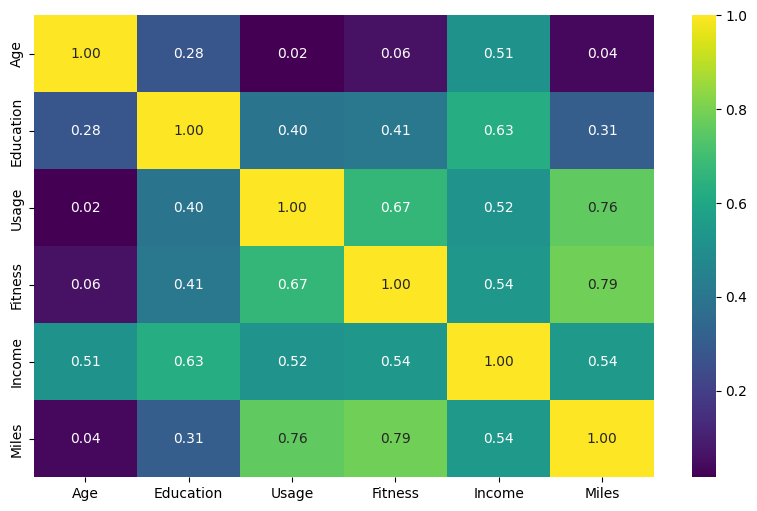

In [95]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='viridis',fmt='.2f')
plt.show()

##**Conditional and Marginal Probabilities**

###**Impact of gender on purchasing the treadmill**

In [98]:
pd.crosstab(index=df['Product'],
            columns=df['Gender'],
            margins=True,
            margins_name='Total')


Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [99]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,5

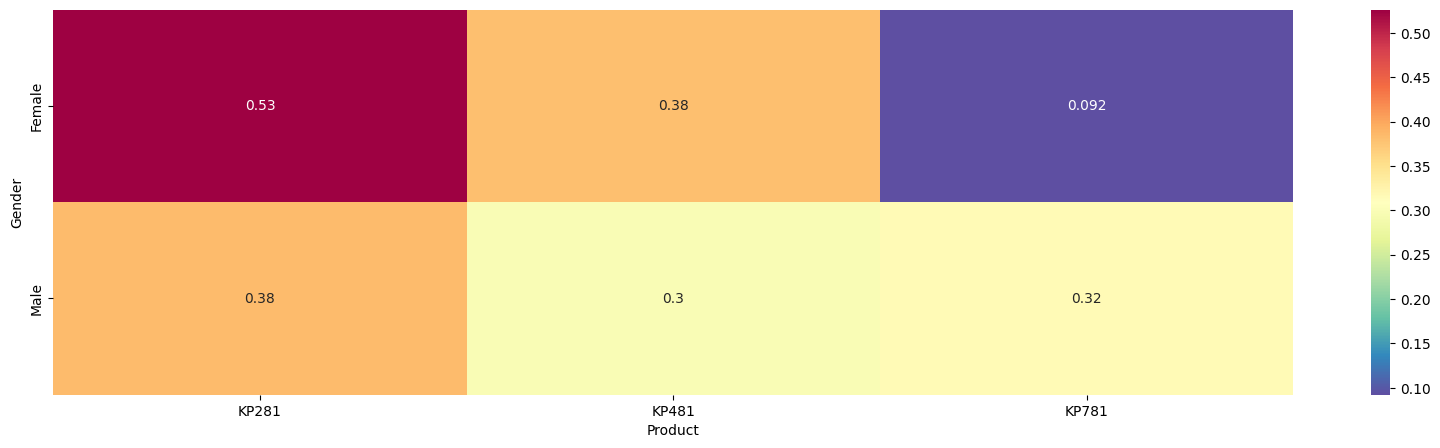

In [101]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability, P(Product | Gender)**



1. Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.

2. Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.

3. Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

4. Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.

5. Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.

6. Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.

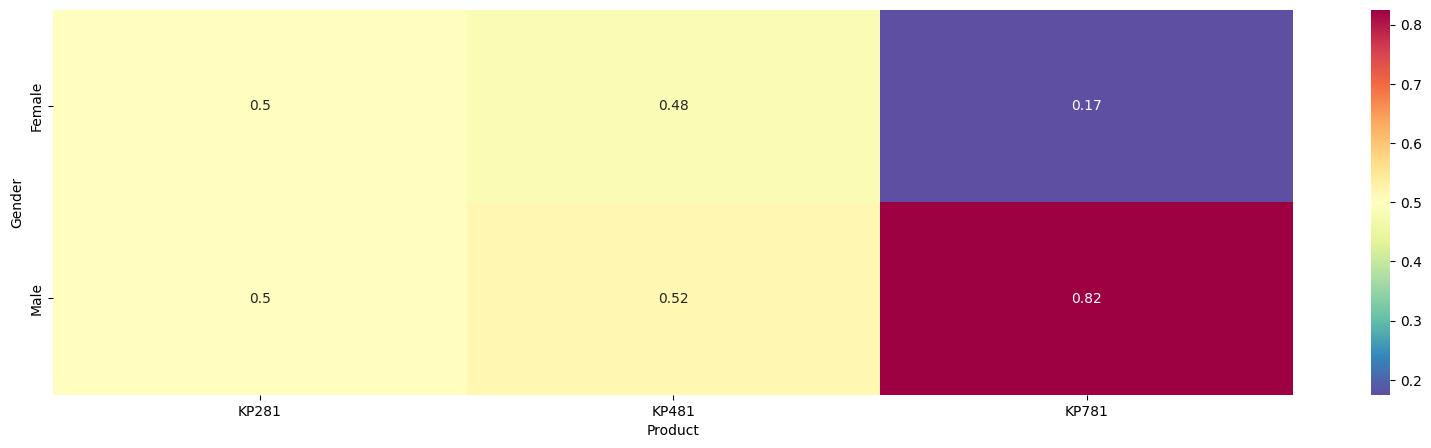

In [103]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability, P(Gender | Product)**

1. Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.

2. Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.

3. Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.

4. Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.

5. Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.

6. Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17.

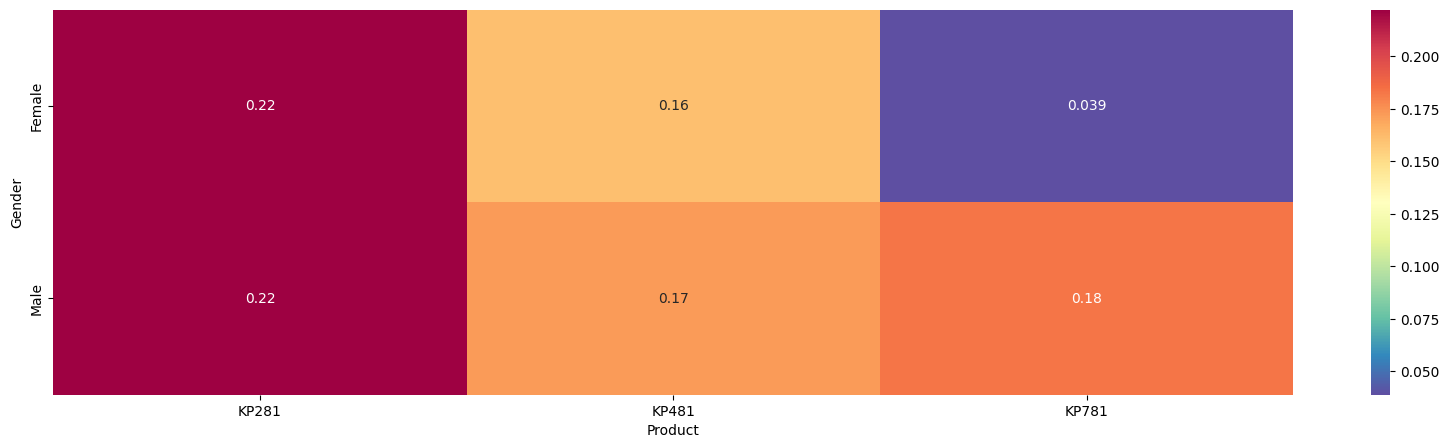

In [105]:
sns.heatmap(pd.crosstab(df['Gender'], df['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

**Joint Probability, P(Product Intersection Gender)**
1. Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
2. Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
3. Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
4. Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
5. Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
6. Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.

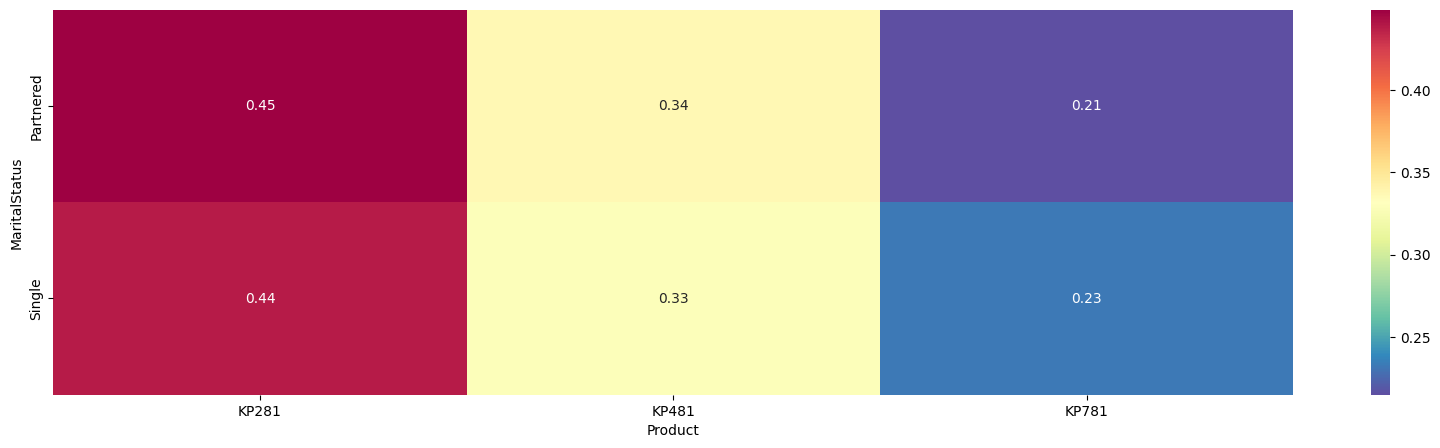

In [107]:
sns.heatmap(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability, P(Product | MaritalStatus)**
1. Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.

2. Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.

3. Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.

4. Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.

5. Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.

6. Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.

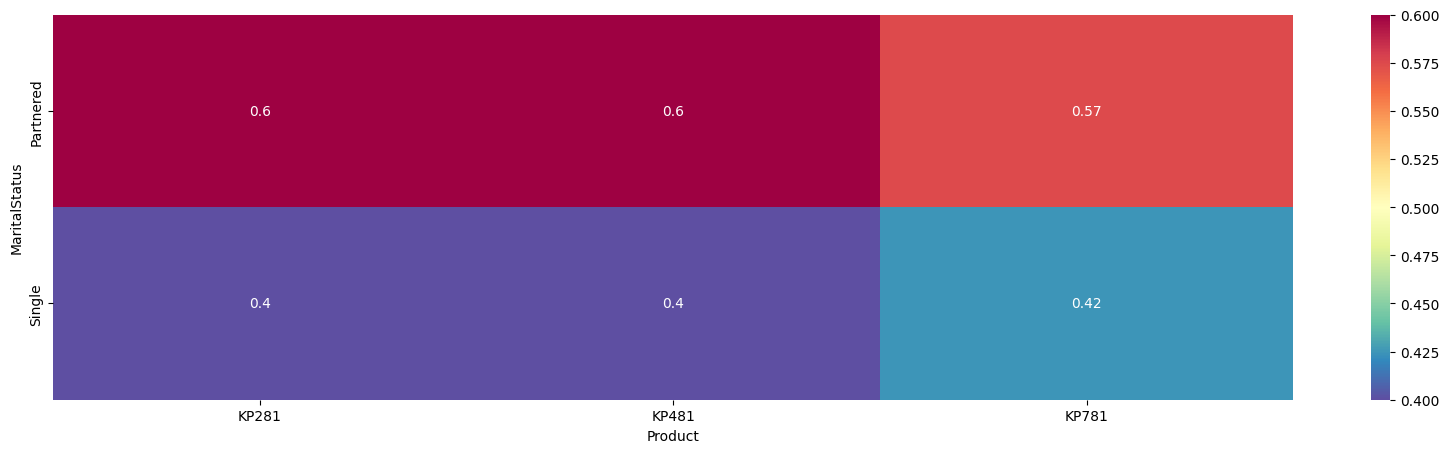

In [109]:
sns.heatmap(pd.crosstab(df['MaritalStatus'], df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability P(MaritalStatus | Product)**

1. Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
2. Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
3. Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
4. Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
5. Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
6. Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57.

In [109]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

**Joint Probability, P(Product Intersection MartialStatus)**
1. Probability of customer buying KP281 and their MartialStatus is Single, P(KP281 Intersection Single) = 0.18.
2. Probability of customer buying KP481 and their MartialStatus is Single, P(KP481 Intersection Single) = 0.13.
3. Probability of customer buying KP781 and their MartialStatus is Single, P(KP781 Intersection Single) = 0.094.
4. Probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 Intersection Partnered) = 0.27.
5. Probability of customer buying KP481 and their MartialStatus is Partnered, P(KP481 Intersection Partnered) = 0.2.
6. Probability of customer buying K7281 and their MartialStatus is Partnered, P(KP781 Intersection Partnered) = 0.13.

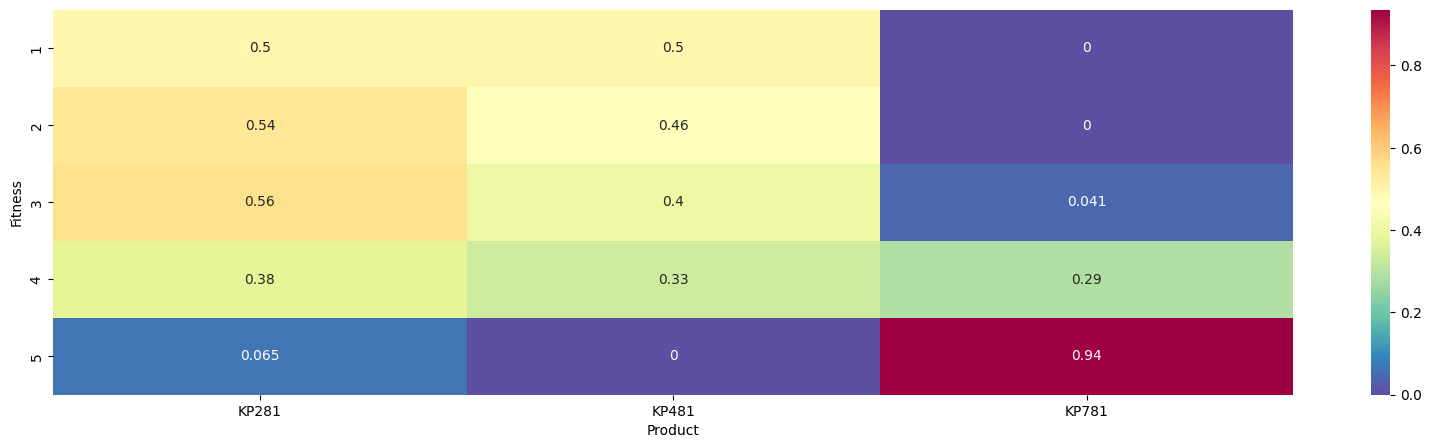

In [111]:
sns.heatmap(pd.crosstab(df['Fitness'], df['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability P(Product | Fitness)**
1. Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
2. Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
3. Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 0.94.
4. Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
5. Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 0.33.
6. Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
7. Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
8. Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
9. Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
10. Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
11. Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
12. Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
13. Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
14. Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
15. Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event).

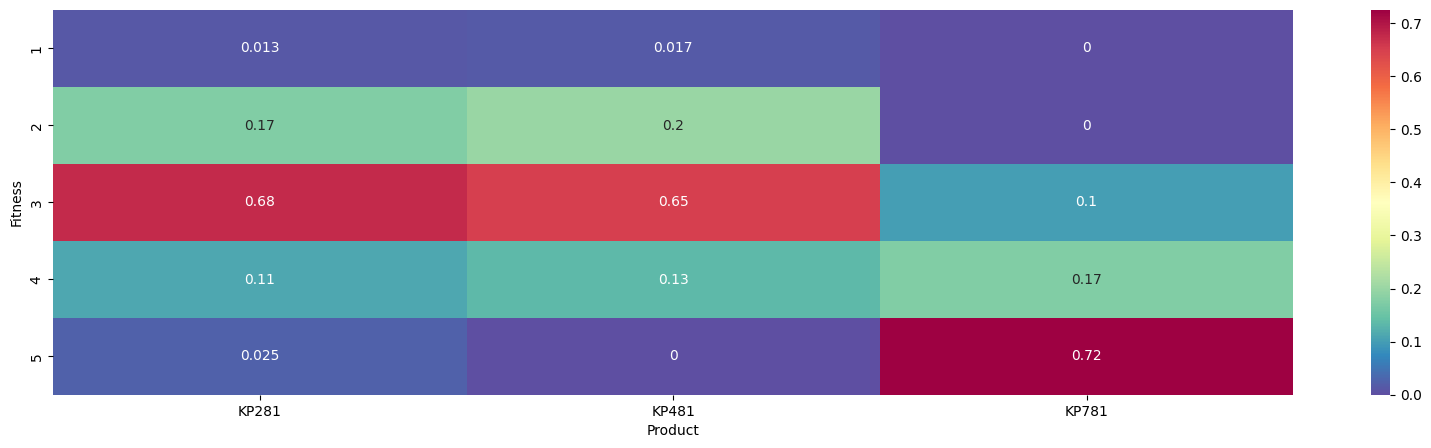

In [113]:

sns.heatmap(pd.crosstab(df['Fitness'], df['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

**Conditional Probability P(Fitness | Product)**
1. Probability of customer fitness rating is 5 given that they purchased KP281, P(Fitness=5 | Product=KP281) = 0.025.
2. Probability of customer fitness rating is 4 given that they purchased KP281, P(Fitness=4 | Product=KP281) = 0.11.
3. Probability of customer fitness rating is 3 given that they purchased KP281, P(Fitness=3 | Product=KP281) = 0.68.
4. Probability of customer fitness rating is 2 given that they purchased KP281, P(Fitness=2 | Product=KP281) = 0.17.
5. Probability of customer fitness rating is 1 given that they purchased KP281, P(Fitness=1 | Product=KP281) = 0.013.
6. Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
7. Probability of customer fitness rating is 4 given that they purchased KP481, P(Fitness=4 | Product=KP481) = 0.13.
8. Probability of customer fitness rating is 3 given that they purchased KP481, P(Fitness=3 | Product=KP481) = 0.65.
9. Probability of customer fitness rating is 2 given that they purchased KP481, P(Fitness=2 | Product=KP481) = 0.2.
10. Probability of customer fitness rating is 1 given that they purchased KP481, P(Fitness=1 | Product=KP481) = 0.017.
11. Probability of customer fitness rating is 5 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.72.
12. Probability of customer fitness rating is 4 given that they purchased KP781, P(Fitness=4 | Product=KP781) = 0.17.
13. Probability of customer fitness rating is 3 given that they purchased KP781, P(Fitness=3 | Product=KP781) = 0.1.
14. Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0.0 (impossible event).
15. Probability of customer fitness rating is 1 given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0.0 (impossible event).

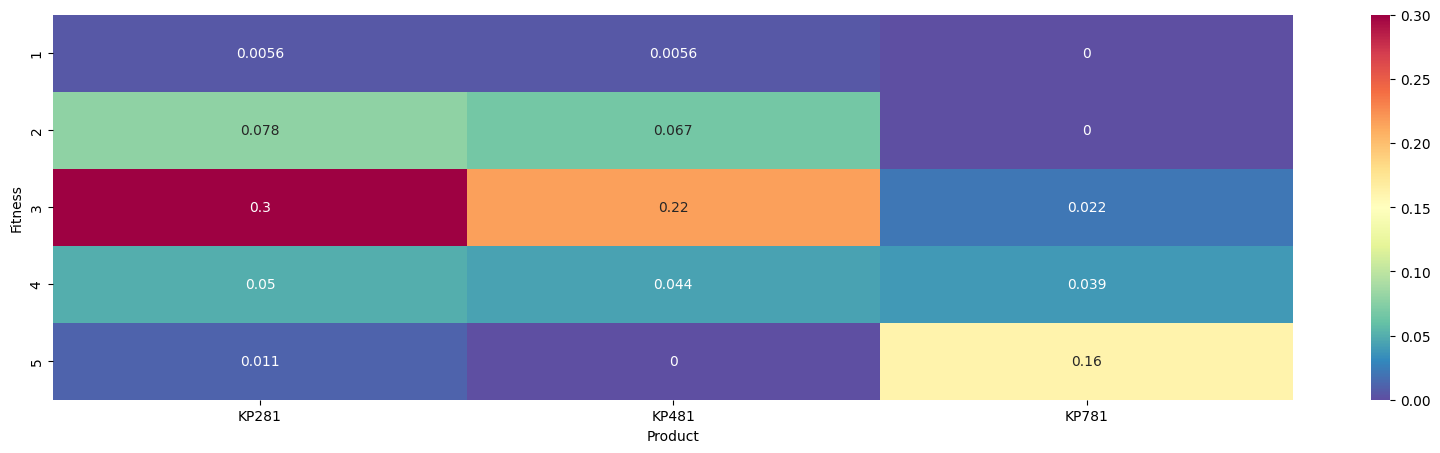

In [115]:
sns.heatmap(pd.crosstab(df['Fitness'], df['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

**Joint Probability P(Product Intersection Fitness)**
1. Probability of buying KP281 and their fitness rating is 5, P(KP281 Intersection Fitness=5) = 0.0011.
2. Probability of buying KP281 and their fitness rating is 4, P(KP281 Intersection Fitness=4) = 0.05.
3. Probability of buying KP281 and their fitness rating is 3, P(KP281 Intersection Fitness=3) = 0.3.
4. Probability of buying KP281 and their fitness rating is 2, P(KP281 Intersection Fitness=2) = 0.078.
5. Probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.
6. Probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
7. Probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
8. Probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
9. Probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
10. Probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.
11. Probability of buying KP781 and their fitness rating is 5, P(KP781 Intersection Fitness=5) = 0.16.
12. Probability of buying KP781 and their fitness rating is 4, P(KP781 Intersection Fitness=4) = 0.039.
13. Probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
14. Probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
15. Probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).

##**Conclusion**

**Business Insights(based on Non-Graphical and Visual Analysis):**

1. The top three purchased treadmill models are KP281, KP481, and KP781, in that order.
2. There is a higher proportion of male buyers compared to female buyers.
3. More customers are in a partnered marital status compared to single.
4. The average age of customers is 28, with a range between 18 to 50 years and a median of 26 years.
5. The average education level of customers is 15.5 years, with a range between 2 to 21 years and a median of 16 years.
6. On average, customers plan to use the treadmill three times per week, with a range between 2 to 7 times per week and a median of three times per week.
7. The average self-fitness rating of customers is 3, with a range between 1 to 5 and a median of 3.
8. Customers' average annual income is 53.7K dollars, with a range between 29.5K dollars to 104K dollars and a median income of 50.5K dollars.
9. The average distance traveled by customers on the treadmill is 103 miles, with a range between 21 to 360 miles and a median of 94 miles.
10. There is a moderately strong relationship between education and income.
11. The relationship between fitness and distance traveled on the treadmill is strong.
12. Similarly, there is a strong relationship between usage frequency and distance traveled on the treadmill.
13. The age difference between the 25th and 75th percentile is nine years, indicating a relatively narrow age spread among customers.
14. The education years difference between the 25th and 75th percentile is two years, suggesting a moderate spread in education levels among customers.
15. Most customers use the treadmill 3-4 times per week, with very few using it 6-7 times per week.
16. The majority of customers rate themselves as moderately fit.
17. The mean income for KP281 buyers is 46.4K dollars, for KP481 buyers is 48.9K dollars, and for KP781 buyers is 75.4K dollars.
18. KP281 and KP481 have the same mean usage of 3, while KP781 has a mean usage of 4.
19. The mean fitness rating for KP281 and KP481 buyers is 3, while for KP781 buyers, it is 4.6.
20. KP781 is the most preferred treadmill among male customers, while females show the least preference for it.
21. Overall, male customers tend to use treadmills more frequently than females.
22. The income distribution between both genders is roughly similar.
23. Males tend to have a higher fitness level compared to females.
24. The distance traveled on the treadmill is roughly the same for both genders, but men tend to cover longer distances, with some going beyond 320 miles.
25. Partnered customers tend to have a higher fitness level compared to singles.

#**Customer Profiling- Categorization of Users**

###**KP281**

1. KP281 stands as the top-selling treadmill model, contributing to 44.44% of total sales.
2. The average income of KP281 buyers is 46.4K dollars.
3. Customers using KP281 have an average planned usage of three times per week.
4. KP281 customers demonstrate an average fitness rating of 3 (rounded).
5. Both genders equally favor the KP281 model as their preferred treadmill choice.
6. The age range of KP281 buyers falls approximately between 22 to 33 years.
7. The income range of KP281 treadmill customers typically lies between 39K dollars to 53K dollars.
8. The education level of KP281 buyers ranges from 14 to 16 years.
9. On the KP281 treadmill, customers cover an approximate distance of 75 to 80 miles.
10. The median/mean fitness rating for KP281 users remains at 3.
11. Single female customers slightly outnumber single male customers in KP281 purchases, while partnered male customers bought KP281 slightly more than single male customers.

###KP481

1. KP481 is the second highest-selling treadmill model, accounting for 33.33% of sales.
2. Customers purchasing KP481 have an average income of 49K dollars.
3. The average planned usage of KP481 customers is three times per week.
4. KP481 customers have an average fitness rating of 3.
5. The KP481 model is slightly more popular among male buyers.
6. Couples are more likely to buy the KP481 model than single customers.
7. The age range of KP481 treadmill customers is typically between 24-34 years.
9. The income range of KP481 customers is approximately 45K dollars - 53K dollars.
10. The educational background of KP481 buyers is similar to that of KP281, spanning 14 - 16 years of education.
11. KP481 customers typically cover a distance of about 75 - 100 miles on the treadmill, making it the second most frequently used model in terms of distance.
12. The median/mean fitness rating for KP481 customers is 3, similar to KP281.
13. The purchase probabilities show no significant gender-based or marital status-based differences for KP481 buyers.

###**KP781**

1. KP781 is a less commonly purchased treadmill model due to its higher price.
2. The average income of KP781 buyers is 75.4K dollars.
3. KP781 customers use the treadmill an average of four times per week.
4. The average fitness rating of KP781 buyers is 4.
5. KP781 is predominantly preferred by males, while fewer females buy this model.
6. The KP781 treadmill is not popular among both single and partnered customers.
7. The age range of KP781 buyers is approximately between 25-30 years, and it has seen relatively fewer purchases, possibly due to its higher cost.
8. The income range for KP781 buyers is roughly between 59K dollars to 92K dollars, showing a wider range compared to KP281 & KP481 models.
9. KP781 buyers typically have an education level ranging from 16 to 18 years, and there is a high correlation between education and income, potentially influencing the purchase decision.
10. KP781's fitness range is between 4 - 5, making it more attractive to people who are already fit and seeking additional features.
11. Partnered females are more likely to buy KP781 treadmills compared to partnered males, whereas single male customers show a higher preference for KP781 compared to single females.

#**Recommendations**

1. Promote KP281 and KP481 treadmills as budget-friendly options, especially targeting customers with annual incomes in the range of 39K - 53K Dollars.
2. Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.
3. Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, leveraging their achievements for better outreach.
4. Run special marketing campaigns on Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.
5. Conduct research to expand the customer base beyond 50 years of age. Offer basic treadmill models (KP281/KP481) as suitable options for beginners in this age group.
6. Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.